<a href="https://colab.research.google.com/github/aryan-parihar/Climate-change-Data-Analysis/blob/main/CCDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')         # Ignore warnings to prevent clutter in output

In [5]:
# Read the dataset from CSV file
df=pd.read_csv('/content/GlobalLandTemperaturesByState.csv')

In [ ]:
df.head()      # Display the first few rows of the dataframe to understand its structure


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
df.dtypes    # Check the data types of each column in the dataframe

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [ ]:
df.shape     # Get the shape (number of rows and columns) of the dataframe

(645675, 5)

In [ ]:
df.isnull().sum()     # Check for missing values in each column and sum them up

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [ ]:
df=df.dropna(how='any',axis=0)  # Drop rows with any missing values

In [ ]:
df.shape    # Verify the new shape of the dataframe after dropping missing values

(620027, 5)

In [ ]:
# Rename columns for easier access and understanding
df.rename(columns={'dt':'Date','AverageTemperature':'Avg_Temp','AverageTemperatureUncertainty':'confidence_interval_temp'},inplace=True)

# Display the first few rows of the dataframe after renaming columns
df.head()

,Date,Avg_Temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
# Convert the 'Date' column to datetime format for time series analysis
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)           # Set the 'Date' column as the index of the dataframe
df.index            # Display the index (now set to 'Date') of the dataframe

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [ ]:
df.describe()       # DESCRIBING OUR DATASET (Providing statistical summary of the numerical columns in the dataframe)

,Avg_Temp,confidence_interval_temp
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [ ]:
# CREATING A SEPERATE YEAR COLUMN IN DATASET
df['Year']=df.index.year    #  Create a new column 'Year' based on the year component of the index (Date)
df.head()                  # Display the first few rows of the dataframe with the 'Year' column added

,Avg_Temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [ ]:
df.describe()       # Provide statistical summary of the dataframe after adding the 'Year' column

,Avg_Temp,confidence_interval_temp,Year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


In [ ]:
# CREATING A DIFFERENT DATAFRAME FOR STORING LATEST YEARS DATA
latest_df=df.loc['1980':'2013']
latest_df.head()

,Avg_Temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [ ]:
#  Calculate and display the average temperature based on countries in the dataset
latest_df[['Country','Avg_Temp']].groupby(['Country']).mean().sort_values('Avg_Temp')

,Avg_Temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


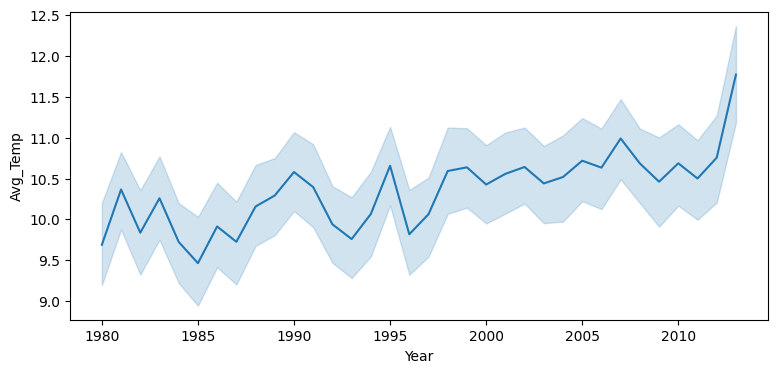

In [ ]:
# plotting a  line graph that represents average temperature variation over  different years
plt.figure(figsize=(9,4))
sns.lineplot(x="Year",y="Avg_Temp",data=latest_df)
plt.show()

# AVERAGE TEMPERATURE OVER THE YEARS SEEMS TO BE RISING

In [ ]:
# RESAMPLE THE TIME SERIES TO CREATE A MORE DISTINCT LINE
# Resample the data annually and calculate the mean temperature for each year
resample_df=latest_df[['Avg_Temp']].resample('A').mean()

In [ ]:
resample_df.head()

,Avg_Temp
Date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


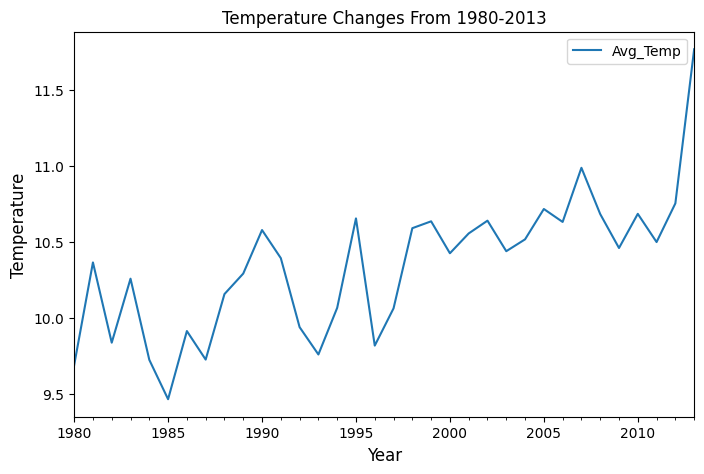

In [ ]:
# PLOOTING THE GRAPH
# Plot the resampled data to show temperature changes from 1980-2013
resample_df.plot(title='Temperature Changes From 1980-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()       #helps to identify different data series in the plot.


In [ ]:

# Apply the Augmented Dickey-Fuller test to check the stationarity of the time series
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller test Result: ')
test_df=adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key, value in test_df[4].items():
  df_output['Critical Value (%s)' %key]= value
print(df_output)

Dickey Fuller test Result: 
Test Statistic                 -0.728209
p-value                         0.839307
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [ ]:
# Decompose the time series into trend, seasonal, and residual components
decomp = seasonal_decompose(resample_df,period=3)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid


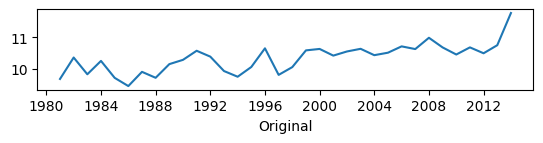

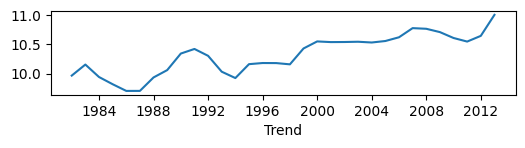

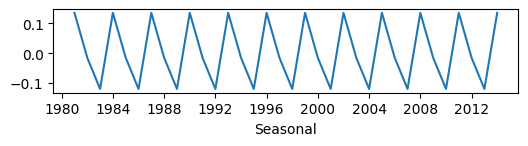

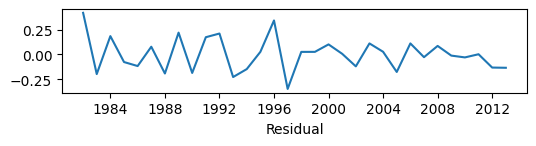

<Figure size 600x500 with 0 Axes>

In [ ]:
# Plot the original, trend, seasonal, and residual components

plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()

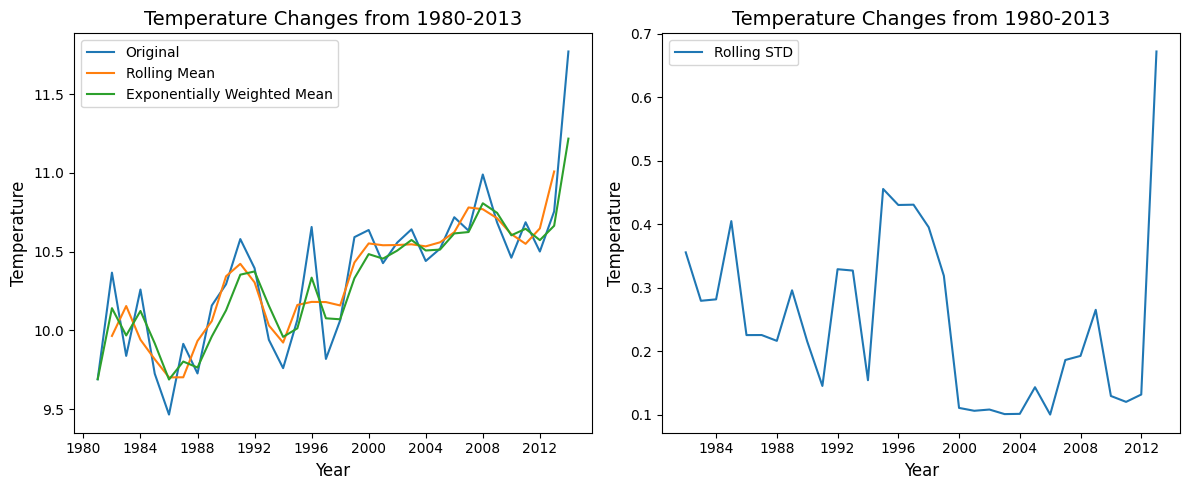

In [ ]:
# Calculate the rolling mean and exponentially weighted mean

rol_mean= resample_df.rolling(window=3,center=True).mean()

#exponentially weighted mean
ewm=resample_df.ewm(span=3).mean()

#rolling standard deviation
rol_std = resample_df.rolling(window=3, center=True).std()

# Plot the original data, rolling mean, and exponentially weighted mean

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(resample_df, label='Original')
ax1.plot(rol_mean, label='Rolling Mean')

ax1.plot(ewm, label='Exponentially Weighted Mean')

ax1.set_title('Temperature Changes from 1980-2013', fontsize=14)

ax1.set_ylabel('Temperature', fontsize=12)

ax1.set_xlabel('Year', fontsize=12)

ax1.legend()

# Plot the rolling standard deviation

ax2.plot(rol_std, label='Rolling STD')

ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)

ax2.set_ylabel('Temperature', fontsize=12)

ax2.set_xlabel('Year', fontsize=12)

ax2.legend()

plt.tight_layout()

plt.show()

In [ ]:
# Drop missing values from rolling mean and exponentially weighted mean
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

# Apply the Dickey-Fuller test to the rolling mean
print ("Dickey-Fuller Test for the Rolling Mean:")
df_test = adfuller(rol_mean.iloc[:,0].values, autolag='AIC')
df_output = pd.Series (df_test[0:4], index= ['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
  df_output['Critical Value (%s) '%key] = value
print(df_output)
print('')

# Apply the Dickey-Fuller test to the exponentially weighted mean
print ('Dickey-Fuller Test for the Exponentially Weighted Mean: ')
df_test = adfuller(ewm.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items ():
  df_output['Critical Value (%s) '%key] = value
print (df_output)

Dickey-Fuller Test for the Rolling Mean:
Test Statistic                  0.275101
p-value                         0.976173
Lags Used                       8.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64

Dickey-Fuller Test for the Exponentially Weighted Mean: 
Test Statistic                 -0.338693
p-value                         0.919843
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [ ]:

# Calculate the difference between the original data and the rolling mean
diff_roll_mean = resample_df - rol_mean
diff_roll_mean.dropna(inplace=True)
diff_roll_mean.head()

,Avg_Temp
Date,
1981-12-31,0.401781
1982-12-31,-0.316726
1983-12-31,0.318708
1984-12-31,-0.091684
1985-12-31,-0.236199


In [ ]:
# Calculate the difference between the original data and the exponentially weighted mean
diff_ewm= resample_df-ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,Avg_Temp
Date,
1980-12-31,0.000000
1981-12-31,0.225574
1982-12-31,-0.129877
1983-12-31,0.136118
1984-12-31,-0.192797


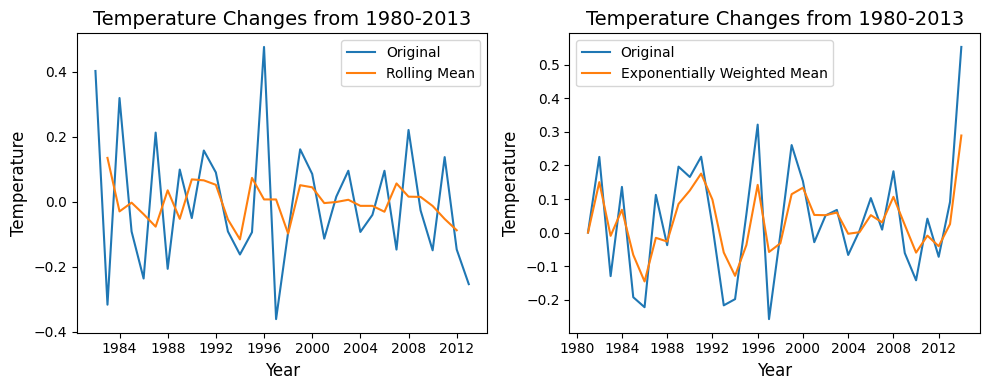

In [ ]:
# Calculate the rolling mean of the differences
df_rol_mean_diff = diff_roll_mean.rolling(window=3, center=True).mean()

df_ewm_diff =diff_ewm.ewm(span=3).mean()

# Plot the differences and their rolling means
fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(10,4))

ax1.plot(diff_roll_mean, label='Original')

ax1.plot(df_rol_mean_diff, label='Rolling Mean')

ax1.set_title('Temperature Changes from 1980-2013', fontsize=14)

ax1.set_ylabel('Temperature', fontsize=12)

ax1.set_xlabel('Year', fontsize=12)

ax1.legend()

ax2.plot(diff_ewm, label='Original')

ax2.plot(df_ewm_diff, label='Exponentially Weighted Mean')

ax2.set_title('Temperature Changes from 1980-2013', fontsize=14)

ax2.set_ylabel('Temperature', fontsize=12)

ax2.set_xlabel('Year', fontsize=12)

ax2.legend()

plt.tight_layout()

In [ ]:
# Apply the Dickey-Fuller test to the difference between the original and rolling mean
print ("Dickey-Fuller Test for the Difference between the Original and Rolling Mean:")

dftest =adfuller(diff_roll_mean.iloc[:,0].values, autolag='AIC')

dfoutput =pd.Series (dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
  dfoutput['Critical Value (%s) '%key] = value

print(dfoutput)

print('')

# Apply the Dickey-Fuller test to the difference between the original and rolling mean
print ("Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:")

dftest =adfuller(diff_ewm.iloc[:,0].values, autolag='AIC')

dfoutput =pd.Series (dftest [0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key ,value in dftest[4].items():
  dfoutput['Critical Value (%s) '%key] = value

print(dfoutput)

Dickey-Fuller Test for the Difference between the Original and Rolling Mean:
Test Statistic                -7.007710e+00
p-value                        7.051586e-10
#Lags Used                     1.000000e+00
Number of Observations Used    3.000000e+01
Critical Value (1%)           -3.669920e+00
Critical Value (5%)           -2.964071e+00
Critical Value (10%)          -2.621171e+00
dtype: float64

Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:
Test Statistic                 -4.297446
p-value                         0.000449
#Lags Used                      1.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


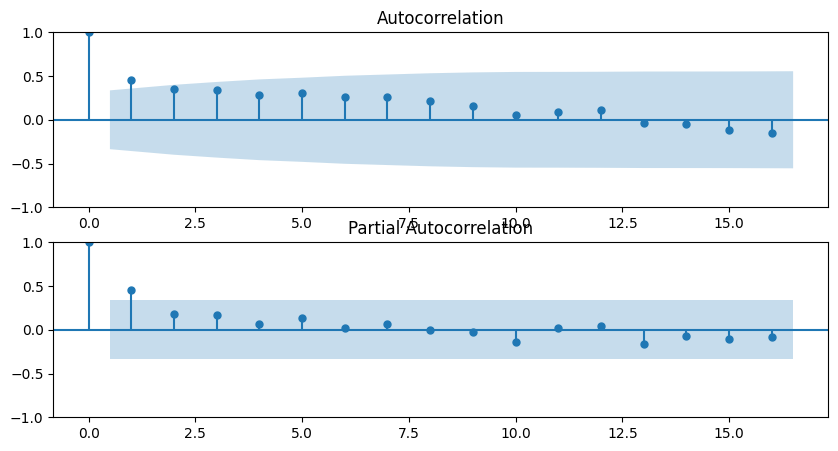

In [ ]:
# Plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(10,5))

pyplot.subplot(211)

plot_acf(resample_df, ax=pyplot.gca())

pyplot.subplot(212)

plot_pacf(resample_df, ax=pyplot.gca())

pyplot.show()